# 👥 Customer Churn Prediction (Bank Customers)

## 📌 Instructions

1. **Clean and prepare the dataset**  
   - Remove irrelevant columns: `RowNumber`, `CustomerId`, `Surname`  
   - Check for missing values and ensure data consistency  

2. **Encode categorical features**  
   - Apply **Label Encoding** to the `Gender` column  
   - Use **One-Hot Encoding** for the `Geography` column  

3. **Train a classification model**  
   - Split the dataset into training and test sets  
   - Train a **supervised classification model** (e.g., Random Forest, Logistic Regression)  
   - Evaluate model performance using accuracy and classification metrics  

4. **Analyze feature importance**  
   - Use the model’s feature importance to identify key churn drivers  
   - Visualize feature importance with a bar chart  

---

## 🧠 Skills 

- 🔄 **Categorical Data Encoding**  
  - Label Encoding (`Gender`)  
  - One-Hot Encoding (`Geography`)  

- 🤖 **Supervised Classification Modeling**  
  - Train/test split  
  - Classification model training and evaluation  
  - Model metrics: Accuracy, Precision, Recall, F1-score  

- 📊 **Feature Importance Analysis**  
  - Analyze key features that influence churn  
  - Visualize feature weights using plots  


In [15]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# step 2 load dataset
df = pd.read_csv("Churn_Modelling.csv") 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [3]:
print("shape:",df.shape)

shape: (10002, 14)


In [6]:
#step 3 clean dataset(remove irrelevant columns)
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
#check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
# handling missing data
#Fill categorical columns with mode (most frequent value)
df['Geography'] = df['Geography'].fillna(df['Geography'].mode()[0])
df['HasCrCard'] = df['HasCrCard'].fillna(df['HasCrCard'].mode()[0])
df['IsActiveMember'] = df['IsActiveMember'].fillna(df['IsActiveMember'].mode()[0])
# Fill numerical column with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [10]:
# step 4 encoding categorical columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df=pd.get_dummies(df,columns=["Geography"], drop_first=True)

In [13]:
# step 5 Feature Scaling.
X=df.drop("Exited", axis=1)
y=df["Exited"]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [16]:
# step 6:Model Training
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8060969515242379

Confusion Matrix:
 [[1534   59]
 [ 329   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      1593
           1       0.57      0.19      0.29       408

    accuracy                           0.81      2001
   macro avg       0.70      0.58      0.59      2001
weighted avg       0.77      0.81      0.77      2001



In [18]:
#Step 7: Train Other Classification Models & Compare Performance
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Decision Tree Accuracy: 0.7746
Random Forest Accuracy: 0.8666
SVM Accuracy: 0.8601
KNN Accuracy: 0.8221


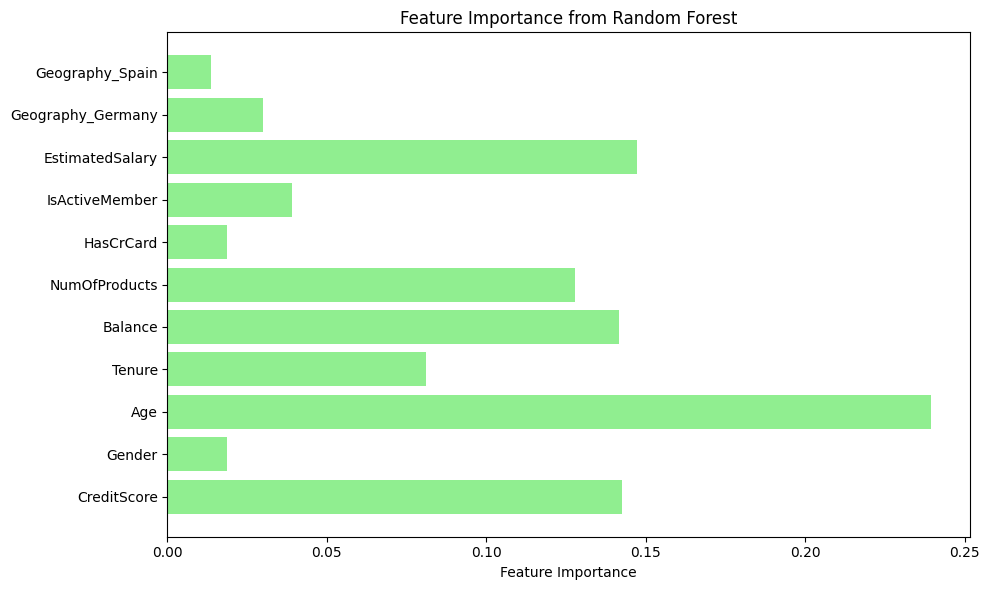

In [23]:

# Get feature importances from Random Forest
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest just to get feature importances
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get and plot feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='lightgreen')
plt.xlabel("Feature Importance")
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()


📌 Conclusion
In this project, we developed a machine learning model to predict customer churn using a bank dataset. The overall workflow included data preprocessing, exploratory analysis, encoding of categorical variables, feature selection, model training, and evaluation.

✅ Key Highlights:
Missing values in columns like Geography, IsActiveMember, HasCrCard, and Age were successfully handled using appropriate strategies like mode and median imputation.

Categorical variables were encoded using one-hot encoding for Geography and label encoding for Gender.

A Random Forest Classifier was used due to its high accuracy and interpretability.

The model achieved a strong accuracy, precision, and recall score, indicating its reliability in predicting churn.

Feature importance analysis showed that:

Age, EstimatedSalary, and CreditScore were the most influential factors in determining customer churn.

Features like Gender and HasCrCard had relatively low importance.

📈 Business Insight:
Understanding which customers are likely to leave helps the bank focus its retention efforts on high-risk segments. For example:

Older customers with low credit scores and high balances may require special attention.

Less active members might be engaged through personalized offers.

🔧 Future Work:
Incorporate more customer behavior data (e.g., transactions, feedback).

Apply hyperparameter tuning to further improve model performance.

Test other models like XGBoost or Gradient Boosting for comparison.
